# Importing the required libraries

In [ ]:
import sys
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist,mnist,cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Flatten,Dense,MaxPooling2D,Conv2D
from tensorflow.keras.optimizers import SGD
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

epochs = 100

# CNN Cifar 10

170508288/170498071 [==============================] - 6s 0us/step
Epoch 1/100
782/782 [==============================] - 196s 249ms/step - loss: 2.0906 - accuracy: 0.2139 - val_loss: 1.8628 - val_accuracy: 0.3275
Epoch 2/100
782/782 [==============================] - 195s 250ms/step - loss: 1.6966 - accuracy: 0.3731 - val_loss: 1.5218 - val_accuracy: 0.4418
Epoch 3/100
782/782 [==============================] - 195s 249ms/step - loss: 1.5369 - accuracy: 0.4383 - val_loss: 1.3968 - val_accuracy: 0.4920
Epoch 4/100
782/782 [==============================] - 195s 249ms/step - loss: 1.4166 - accuracy: 0.4847 - val_loss: 1.3713 - val_accuracy: 0.4967
Epoch 5/100
782/782 [==============================] - 195s 249ms/step - loss: 1.3288 - accuracy: 0.5177 - val_loss: 1.1995 - val_accuracy: 0.5708
Epoch 6/100
782/782 [==============================] - 194s 248ms/step - loss: 1.2574 - accuracy: 0.5473 - val_loss: 1.1366 - val_accuracy: 0.5964
Epoch 7/100
782/782 [==============================

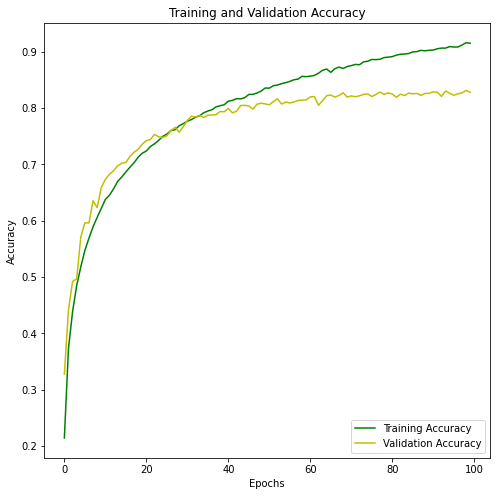

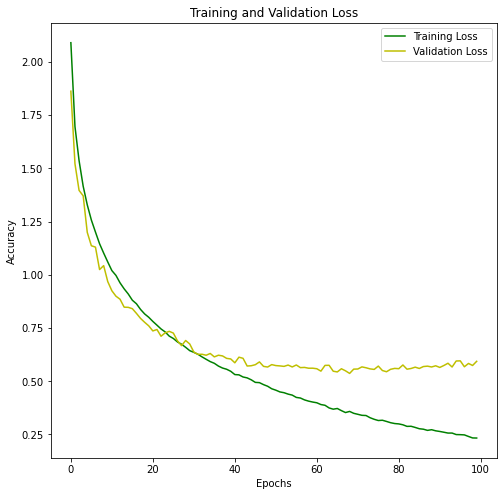

Program Execution Time (CPU):  19661.047607898712  seconds


In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	epochs_range = range(epochs)

	plt.figure(figsize=(8, 8))
	plt.plot(epochs_range, acc, label='Training Accuracy',c='g')
	plt.plot(epochs_range, val_acc, label='Validation Accuracy',c='y')
	plt.legend(loc='lower right')
	plt.title('Training and Validation Accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.show()

def Loss_Diagnostics(history):
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	epochs_range = range(epochs)
 
	plt.figure(figsize=(8, 8))	
	plt.plot(epochs_range, loss, label='Training Loss',c='g')
	plt.plot(epochs_range, val_loss, label='Validation Loss',c='y')
	plt.legend(loc='upper right')
	plt.title('Training and Validation Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=epochs, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	val, acc = model.evaluate(testX, testY, verbose=1)
	print('')
	print('Model Test Accuracy: ', acc*100, " %")
    
	# learning curves
	print('Output Graphs: \n')
	summarize_diagnostics(history)
	Loss_Diagnostics(history)
 

#Running Time Calculation
start_Cifar = time.time()
run_test_harness()
end_Cifar = time.time()
time_Cifar = end_Cifar - start_Cifar
print("Program Execution Time (CPU): ", time_Cifar , " seconds")

# CNN Fashion

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/100
600/600 [==============================] - 164s 272ms/step - loss: 0.6201 - accuracy: 0.7729 - val_loss: 0.3552 - val_accuracy: 0.8667
Epoch 2/100
600/600 [==============================] - 163s 271ms/step - loss: 0.3400 - accuracy: 0.8760 - val_loss: 0.2947 - val_accuracy: 0.8895
Epoch 3/100
600/600 [==============================] - 163s 272ms/step - loss: 0.2855 - accuracy: 0.8960 - val_loss: 0.2670 - val_accuracy: 0.9037
Epoch 4/100
600/600 [==============================] - 162s 271ms/step - loss: 0.2548 - accuracy: 0.9053 - val_loss: 0.2340 - val_accuracy: 0.9112
Epoch 5/100
600/600 [==============================] - 163s 272ms/step - loss: 0.2313 - accuracy: 0.9144 - val_loss: 0.2162 - val_accuracy: 0.9197
Epoch 6/100
600/600 [==============================] - 162s 270ms/step - loss: 0.2188 - accuracy: 0.9195 - val_loss: 0.2047 - val_accuracy: 0.9244
Epoch 7/100
600/600 [==============================] - 

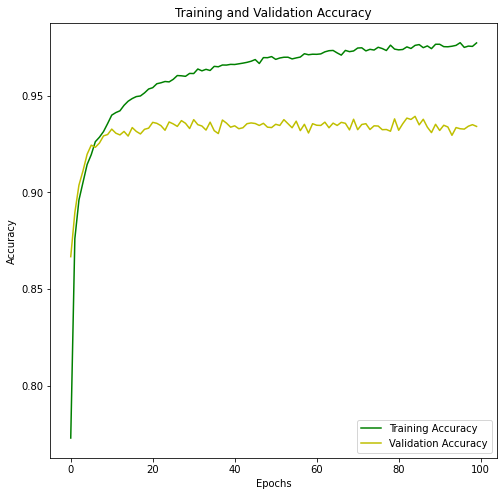

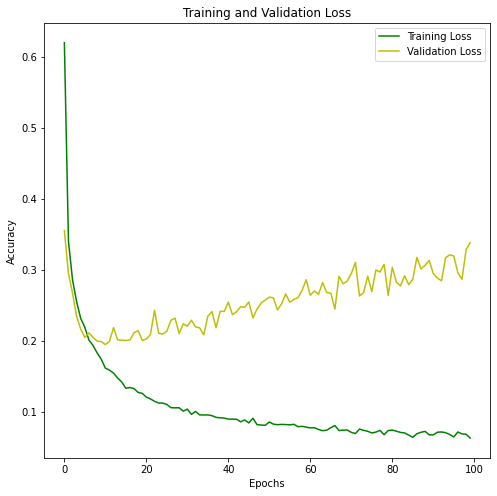

In [ ]:
# load train and test dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# return normalized images

trainX = np.expand_dims(train_norm, -1)
testX = np.expand_dims(test_norm, -1)
 
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

start_fashion = time.time()
# fit model
history = model.fit(trainX, trainY, epochs=epochs, batch_size=100, validation_data=(testX, testY), verbose=1)
val, acc = model.evaluate(testX, testY, verbose=1)
print('')
print('Model Test Accuracy: ', acc*100, " %")
end_fashion = time.time()
time_fashion = end_fashion - start_fashion
print("Program Execution Time (CPU): ", time_fashion , " seconds")


# plot diagnostic learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy',c='g')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',c='y')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))	
plt.plot(epochs_range, loss, label='Training Loss',c='g')
plt.plot(epochs_range, val_loss, label='Validation Loss',c='y')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# CNN Mnist

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/100
469/469 - 179s - loss: 0.3268 - accuracy: 0.8937 - val_loss: 0.0360 - val_accuracy: 0.9888 - 179s/epoch - 382ms/step
Epoch 2/100
469/469 - 174s - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0280 - val_accuracy: 0.9899 - 174s/epoch - 372ms/step
Epoch 3/100
469/469 - 175s - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0208 - val_accuracy: 0.9931 - 175s/epoch - 374ms/step
Epoch 4/100
469/469 - 177s - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0237 - val_accuracy: 0.9929 - 177s/epoch - 378ms/step
Epoch 5/100
469/469 - 176s - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0256 - val_accuracy: 0.9916 - 176s/epoch - 374ms/step
Epoch 6/100
469/469 - 176s - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0211 - val_accuracy: 0.9936 - 176s/epoch - 374ms/step
Epoch 7/100
469/469 - 176s - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0192 - val_accuracy: 0.9939 - 176s/epoch - 374ms/step
Epoch 8/100
469/469 - 176s - los

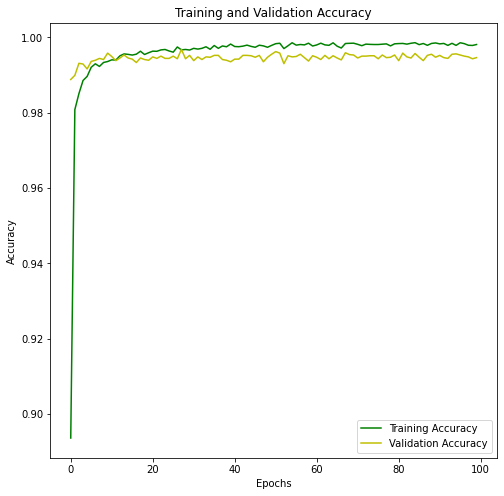

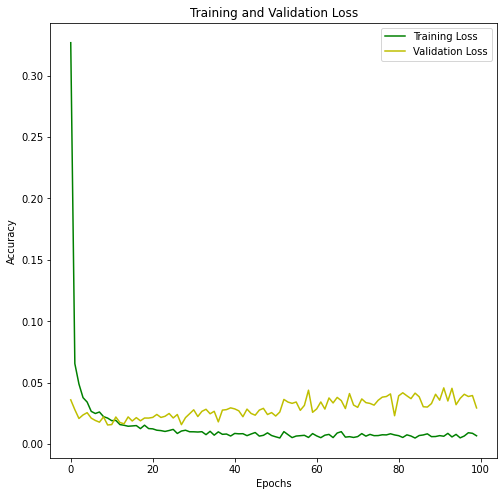

In [ ]:
# load train and test dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# return normalized images

trainX = np.expand_dims(train_norm, -1)
testX = np.expand_dims(test_norm, -1) 

# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

 
# fit model
start_minst = time.time()
history = model.fit(trainX, trainY, epochs=epochs, batch_size=128, validation_data=(testX, testY), verbose=2)

val, acc = model.evaluate(testX, testY, verbose=1)
print('')
print('Model Test Accuracy: ', acc*100, " %")
end_mnist = time.time()
mnist_time = end_mnist - start_minst
print("Program Execution Time (CPU): ", mnist_time , " seconds")

# plot diagnostic learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy',c='g')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',c='y')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))	
plt.plot(epochs_range, loss, label='Training Loss',c='g')
plt.plot(epochs_range, val_loss, label='Validation Loss',c='y')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()